/home/swang/xuhw/tools/anaconda3/envs/fsq/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
searching patients: 100%|██████████| 16/16 [00:00<00:00, 23663.21it/s]


number of edges: 12
number of nodes: 19
find patients: 519, other patients: 458
case pos: 386, case neg: 332, neg: 214
p-value: 0.0104
p-value: 0.0429


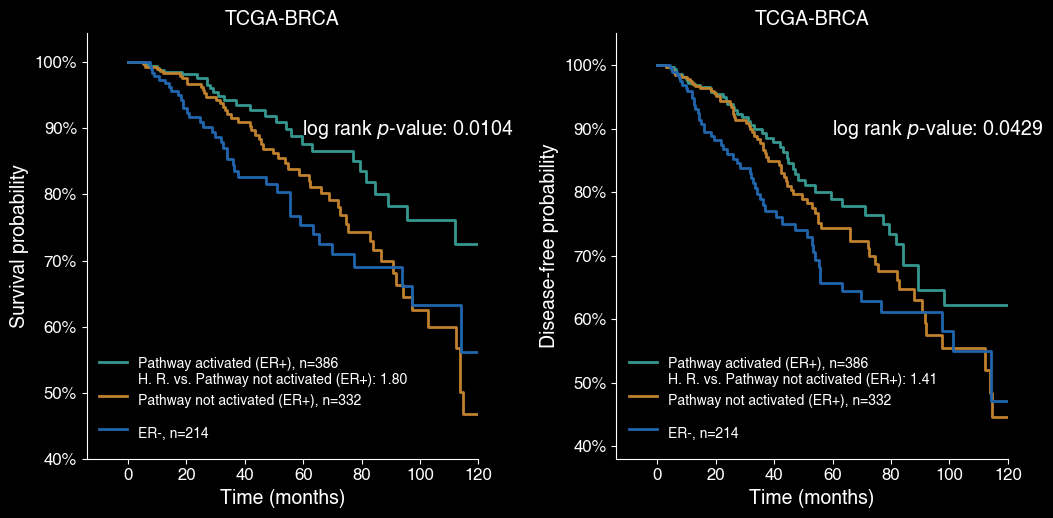

In [1]:
import sys
root_dir = '../Pisces/scripts/case_study/gdsc_novel_combo/'
sys.path.append(root_dir)
from fig_settings import *
from utils import search_patients, load_survival_info_3_cls, load_dfs_info_3_cls, load_brca_subtype_info, get_brca_subtype_patient_3_cls

ct='BRCA'
alpha=1
subtype2pa = load_brca_subtype_info()
case_group, control_group, all_edges = search_patients(ct=ct, th=30)
case_pos, control_pos, neg = get_brca_subtype_patient_3_cls(case_group, control_group, subtype2pa)
res = load_survival_info_3_cls(case_pos, control_pos, neg, ct=ct)

import sys
root_dir = 'figures/'
sys.path.append(root_dir)
from fig_settings import *

import fig_settings, fig_utils
import matplotlib.pyplot as plt
fig, axes = fig_settings.get_double_axis()
fig_utils.kaplan_meier_curve_3_cls(axes[0], res['survival time'], res['survival status'],
                              ['Pathway activated (ER+), n=386', 'Pathway not activated (ER+), n=332', 'ER-, n=214'], xlabel='Time (months)',
                              ylabel='Survival probability', showCI=False,
                              colors=get_er_analysis_colors(), alpha=alpha,
                              max_time=120, min_y=0.4)
axes[0].set_title('TCGA-BRCA')
res = load_dfs_info_3_cls(case_pos, control_pos, neg, ct=ct)
fig_utils.kaplan_meier_curve_3_cls(axes[1], res['dfs time'], res['dfs status'],
                              ['Pathway activated (ER+), n=386', 'Pathway not activated (ER+), n=332', 'ER-, n=214'], xlabel='Time (months)',
                              ylabel='Disease-free probability', showCI=False,
                              colors=get_er_analysis_colors(), alpha=alpha,
                              max_time=120, min_y=0.38)
axes[1].set_title('TCGA-BRCA')
fig_utils.format_ax(axes[0])
fig_utils.format_ax(axes[1])
fig.tight_layout()
plt.savefig(f'save_figs/{ct}_brca_er_plot.png', bbox_inches='tight', dpi=300)

searching patients: 100%|██████████| 16/16 [00:00<00:00, 22779.66it/s]


number of edges: 12
number of nodes: 19
find patients: 519, other patients: 458
p-value: 0.0030
p-value: 0.0078


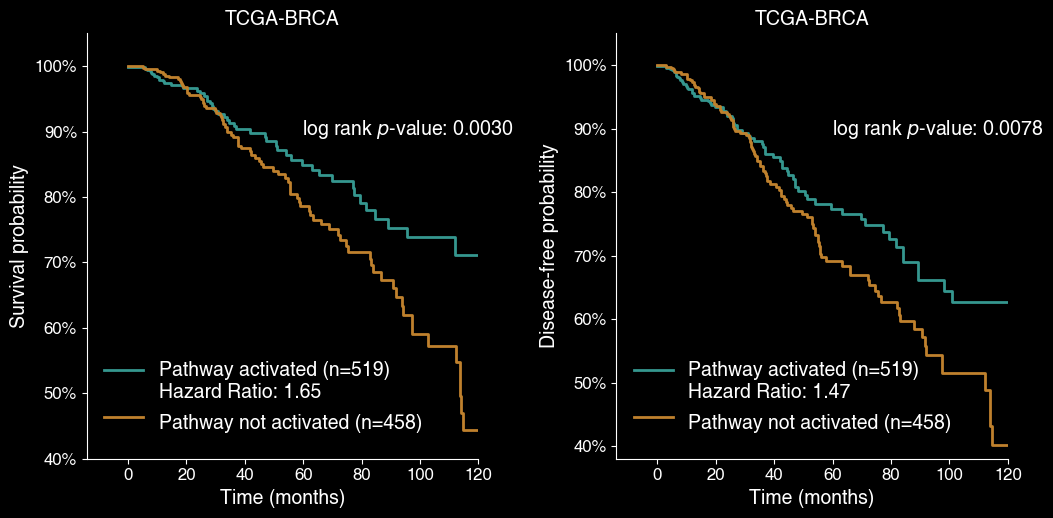

Bad pipe message: %s [b'\xff\xd1\xf2x\x9d\xb3\x8d\x05\x08\xc0\xf3\xe7\xc2\x90:\xaeW\x89 \xb4,\xe5\xe9m\x7f\x8f7W\x1c\xd7lK\xbf\xce\xb1\xd2\x1c{\x87\xaf*#\\7\xf6\xc7\xf4G\x98\xcd!\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00', b'\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 2\xb8\xf6\x10\xdc\n\xa8\xd8\x16AJ\xa2\x1a&R!8s\x80\xa5H\xb2']
Bad pipe message: %s [b"!q\xc76\xbf\r\x93\xf6\xa7-\x958\xcc0\xe4\x97\x8f)\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R

In [2]:
import sys
root_dir = '../Pisces/scripts/case_study/gdsc_novel_combo/'
sys.path.append(root_dir)
from fig_settings import *
from utils import search_patients, load_survival_info, load_dfs_info

ct='BRCA'
alpha=1
case_group, control_group, all_edges = search_patients(ct=ct, th=30)
res = load_survival_info(case_group, control_group, ct=ct)
import fig_settings, fig_utils
import matplotlib.pyplot as plt
fig, axes = fig_settings.get_double_axis()
fig_utils.kaplan_meier_curve(axes[0], res['survival time'], res['survival status'],
                              ['Pathway activated (n=519)', 'Pathway not activated (n=458)'], xlabel='Time (months)',
                              ylabel='Survival probability', showCI=False,
                              colors=[get_case_vs_control_colors('Case'), get_case_vs_control_colors('Control')], alpha=alpha,
                              max_time=120, min_y=0.4)
axes[0].set_title('TCGA-BRCA')
res = load_dfs_info(case_group, control_group, ct=ct)
fig_utils.kaplan_meier_curve(axes[1], res['dfs time'], res['dfs status'],
                              ['Pathway activated (n=519)', 'Pathway not activated (n=458)'], xlabel='Time (months)',
                              ylabel='Disease-free probability', showCI=False,
                              colors=[get_case_vs_control_colors('Case'), get_case_vs_control_colors('Control')], alpha=alpha,
                              max_time=120, min_y=0.38)
axes[1].set_title('TCGA-BRCA')
fig_utils.format_ax(axes[0])
fig_utils.format_ax(axes[1])
fig.tight_layout()
plt.savefig(f'save_figs/{ct}_gdsc_tcga_plot.png', bbox_inches='tight', dpi=300)

In [2]:
root_dir = '../Pisces/scripts/case_study/gdsc_novel_combo/'
pa_save_path = f'{root_dir}/output/{ct}_pathway.txt'
ge_save_path = f'{root_dir}/output/{ct}_gene.txt'
gene_set = []
f = open(pa_save_path, 'w')
for e in all_edges:
    f.write(f'{e[0]}-->>{e[1]}\n')
    if e[0] not in gene_set:
        gene_set.append(e[0])
    if e[1] not in gene_set:
        gene_set.append(e[1])
f.close()
f = open(ge_save_path, 'w')
for g in gene_set:
    f.write(f'{g}\n')
f.close()

Merge the SDL networks and the string networks

In [2]:
import pandas as pd
import collections
ct='BRCA'
root_dir = '../Pisces/scripts/case_study/gdsc_novel_combo/'
string_interact_path = f'{root_dir}/data/string_interactions_short_adjust.csv'
cytoscape_path = f'{root_dir}/output/{ct}_gephi.csv'
node_attr_path = f'{root_dir}/output/{ct}_node_attr.csv'
string_df = pd.read_csv(string_interact_path)

nodes1 = string_df['node1'].tolist()
nodes2 = string_df['node2'].tolist()

# load the drug target
drug_target_path = '../data/drug_combo/drug_target.csv'
gene_id_path = '../data/ppi/symbol2node.tsv'
id2gene = collections.OrderedDict()
drug2target = collections.OrderedDict()
f = open(gene_id_path, 'r')
lines = f.readlines()
for line in lines[1:]:
    g, id = line.strip().split('\t')
    id2gene[int(id)] = g
f.close()

all_genes = []
for e in all_edges:
    if e[0] not in all_genes:
        all_genes.append(e[0])
    if e[1] not in all_genes:
        all_genes.append(e[1])
f = open(drug_target_path, 'r')
lines = f.readlines()
for line in lines[1:]:
    drug, target = line.strip().split(',')
    if id2gene[int(target)] not in all_genes:
        continue
    drug2target[drug] = id2gene[int(target)]

f = open(cytoscape_path, 'w')
f.write('Source,Target,Edge Label,Weight,Type\n')
for i in range(len(nodes1)):
    if (nodes1[i], nodes2[i]) in all_edges or (nodes2[i], nodes1[i]) in all_edges:
        print(nodes1[i], nodes2[i])
        continue
    f.write(f'{nodes1[i]},{nodes2[i]},PPI,1,Undirected\n')
for e in all_edges:
    if e[0] == e[1]:
        continue
    f.write(f'{e[0]},{e[1]},SDL,2,Directed\n')
for d in drug2target:
    f.write(f'{d},{drug2target[d]},drug_target,2,Directed\n')
f.close()

f = open(node_attr_path, 'w')
f.write('Id,Label,Type\n')
for e in all_genes:
    f.write(f'{e},{e},gene\n')
#for d in drug2target:
#    f.write(f'{d},{d},drug\n')
f.close()


EGFR SDC4
EGFR IGFBP3
